# Milestone 2: "KeyDifferentiator" Auto-Diff Library

**Authors:** Kate Grosch, Mingyue Wei, Spencer Penn

**Summary:** Automatic Differentiation Library created in CS207 course at Harvard University taught by Dr. David Sondak.

## Introduction

Our goal in this project is to develop a software library for Automatic Differentiation. We will create a useful tool, familiarize ourselves with software development best-practices, and learn how machines perform differentiation.

The final deliverable will be an automatic differentiation library in python that is easy to understand, install, and use -- including clear documentation and testing.

Beyond the baseline expectation, we intend to extend our project in a specific way: allow for the ingestion of screenshots. 

**Extended Functionality:** The basic automatic differentiation would accept values or vectors to represent the functional inputs. Beyond the basic functionality, our library will include two key feature extensions. The first is (1) string parsing. The user of the library in terminal will be able to input a function as a text-entry into the command line. Of course, the functionality still exists for users to access the underlying `AD` library directly. And secondly (2), we are extending the functionality to include both forward-mode as well as reverse-mode automatic differentiation accumulation (explained below). 

## Background

Automatic differentiation is how computers can automatically evaluate derivatives, which comes up in a lot of contexts. The two most obvious approaches to differentiation are symbolic differentiation (applying the rules of variable-level differentiation in software) and numerical differentiation (a finite difference-based approximation of a derivative). 

The failure of symbolic differentiation is that it can be inefficient in solving high-complexity expressions, yielding long computation times. By contrast, the failure of numerical differentiation is that it can be prone to floating-point error in discretization or suffer from numerical instability.

### The Chain Rule
In contrast, automatic differentiation applies the chain rule repeatedly to break down arbitrarily complicated differentiation problems into a series of elementary arithmetic operations and elementary functions. 

$$ F'(x) = f'(g(x))g'(x)$$

In a way, a derivative is a local linear approximation of a function. By applying the chain rule, we can break down any derivative solving problem, even with high complexity or a partial derivative with respect to many inputs (e.g. gradient-based optimization) into a sequential composition of functions.  

### Graph Structure of Calculations
While there are many different ways to conceptualize the process used in automatic differentiation, the one explored in our class involves a graphical representation of the calculation. 

In the first step, we break down the function into an “evaluation trade,” with a set of xi traces (or intermediary computed variables).

From there, you can visualize the calculation steps in an “evaluation graph” - simply a graphical representation of the computation elements with edges and notes (similar to a control loop diagram). 

### Elementary Functions
Finally, through each step you evaluate both the trace in terms of the input variable and also compute the derivative using the chain rule. At the end of this process, the final xi trace now is assigned both a value and a derivative that is simply composed of elemental function that are easy for a computer to evaluate. 

To give some concrete examples, the key elementary arithmetic operations include: addition, subtraction, multiplication, division, etc... and the key elementary functions include: exp, log, sin, cos, etc...


### Example of Automatic Differentiation:

Consider an example function:

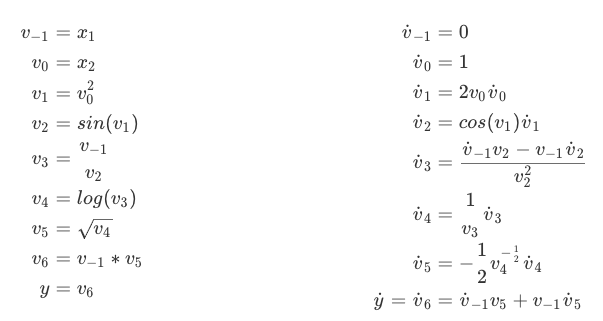

Looking at the partial derivative with respect to x2 is already pretty hairy: 

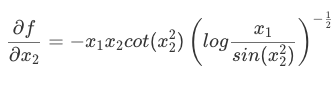

To evaluate the gradient or derivative at any arbitrary value, numerical methods would be plagued with truncation and round-off errors. While the symbolic method is algebraically challenging and computationally expensive. 

With Automatic differentiation we can build a computational graph to compartmentalize the function into elementary sequential steps:

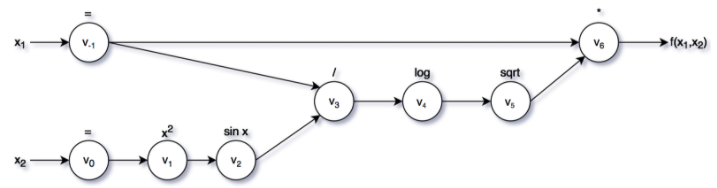

_Computational Graph for Function in the Forward Mode_

To evaluate the value and derivative at each node, we walk though the graph and compose the evaluation traces:

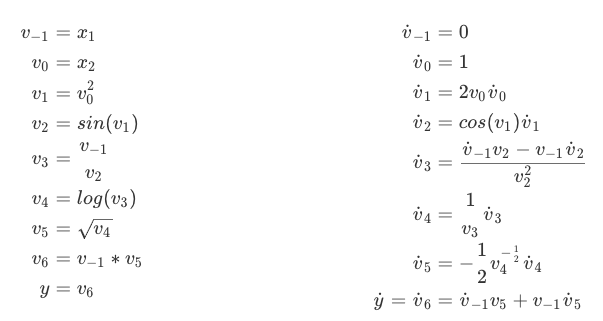

In the forward trace mode, each term can be calculated from operands that have already been calculated in a higher term. 

The reverse mode is a similar technique, sometimes referred to as backpropagation, but instead the trace on the right is evaluated from bottom to top:

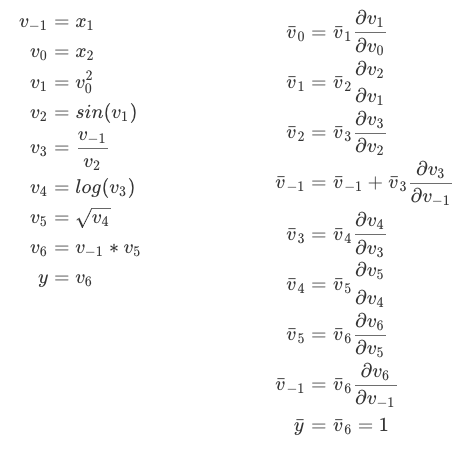

(NOTE: we were instructed by our TA, CJ Xin, to include images from the lecture slides for additional context, but to cite below)

### Citations:
We would like to attribute some of the graphics above to the following sources:
- CS207 Course Website: https://harvard-iacs.github.io/2019-CS207/
- A Hitchhiker’s Guide to Automatic Differentiation: Hoffmann, P.H.W. Numer Algor (2016) 72: 775. https://doi.org/10.1007/s11075-015-0067-6
- The magic of Automatic Differentiation, Sanyam Kapoor: https://www.sanyamkapoor.com/machine-learning/autograd-magic/


## How to Use KeyDifferentiator

### Installation
To install the KeyDifferentiator automatic differentiation package, the user should run:
```
pip install keydifferentiator
```
Alternatively, the user could download and run the package using the source files on GitHub. Simply run:
```
git clone git@github.com:Key-Differentiators/cs207-FinalProject.git
cd cs207-FinalProject
python setup.py
```

### Getting Started


#### Using The Command-Line Interface (String-Parser)

Users interact with our module via a command-line interface. To start the interface, run:
```
python -m keydifferentiator
```
The command line will prompt the user to enter a function. The tool only accepts single-variable functions. Here are some examples:
```
Input your function:   f(x) = 3*x + 4
Input your function:   f(x) = cos(x) + x**2
Input your function:   f(x) = 3*x + 4
Input your function:   f(x) = 3*x**2 + 2*x + 1
```
Once the user enters a function, the user is prompted to enter a value of x at which to evaluate the derivative. Here is an example:
```
What value of x would you like to evaluate at? Enter a number: 3
```
The interface then prints out the values of the function f(x) and the derivative f'(x) at that value of x:
```
f(x)=34.00, f'(x)=20.00
```
The user is then prompted to enter another function (if desired).


#### Using the AD Library Directly

Create an AD Object and Run basic operations:

```
# basic operations
a = AD(3.0)
b = AD(4.0)
c = a+b
d = a*b+5

# display parameter values:
c.val, c.der
d.val, d.der
```


#### Accessing the Unary Functions

Each unary function is set up in a similar way, taking in an `AD` object parameter values and then applying a specific elementary operation to return a resulting object.

Code snippet of how to create an AD Object and Run a Unary Function:

```
# Create AD Object, apply sin function:
unary.sin(ad.AD(3.0))

# Create AD Object, apply sin function, display parameter values:
unary.sin(ad.AD(3.0)).val
unary.sin(ad.AD(0.5)).der
```

## Software Organization

### Directory Structure

Our directory structure is outlined below. 

```
/cs207-FinalProject
	README.md
	LICENSE
    .gitignore
    .travis.yml
    setup.py
    requirements.txt
    docs/
        milestone1.ipynb
        milestone2.ipynb
    keydifferentiator/
        __init__.py
        __main__.py
        AD.py
        unary.py
    tests/
        __init__.py
        AD_test.py
        unary_test.py
```

- **README.md**: Project documentation, build status, and code coverage.
- **LICENCE**: Text of the MIT license.
- **.gitignore**: Files to exclude when pushing to GitHub.
- **.travis.yml**: Configures the TravisCI build integration.
- **setup.py**: Packages the modules into the keydifferentiator package.
- **requirements.txt**: Describes version and installation requirements of the build.
- **docs/**: Directory containing Milestone 1 and Milestone 2 documentation.
- **keydifferentiator/**: 
    - **__init__.py**: Tells setup.py that this is a package.
    - **__main__.py**: Contains the command-line interface for the project (including string-parsing)
    - **AD.py**: Contains the AD class, and overwrites dual operations for AD objects.
    - **unary.py**: Contains a library of unary operations for AD objects.
- **tests/**:
    - **__init__.py**: Tells setup.py that this is a package.
    - **AD_test.py**: Test code for the AD class.
    - **unary_test.py**: Test code for the unary function library.

### Distribution Choice


#### PyPi
To speak directly to our packaging of this software library, the team chose to distribute through PyPi - The Python Package Index - the official third-party software repository for Python

Our specific distribution can be found here: https://pypi.org/project/keydifferentiator/

The PyPi repository boasts 205,185 projects, across 1,544,442 releases, or 2,302,428 files, employed by 386,601 users. Distributing here poses several benefits. Beyond being a standard and widely-used method for publishing libraries, PiPy also allows our uses to employ the pip install method as directed above in the "Installation" section. 

Here we can maintain the project, its descriptions as well as a release history to give transparency and maintainability to users. 

#### PIP Install

By distributing through PyPi, we also enable our users to install the library via PIP. PIP is the de-facto standard package-management system used to install and manage software packages written in Python.

#### Note on Dependences: 
Many libraries (including ours) have dependencies on other standard libraries (e.g. in our case, primarily `numpy`). By including a requirements.txt file in the package distribution through PyPi and employing PIP for installation -- the system also installs all dependencies so long as they are specified properly. 

### Testing

Tests live within `AD_test.py` and `unary_test.py` files. 

For maintaining real-time testing at a high standard we use both Travis CI and Codecov. Travis CI is ahosted continuous integration service used to build and test software projects. While Codecov gives a metric for the portion of the library code which is covered by our tests. 

Testing status for both approaches is viewable on our Github and PyPi repository pages.

## Implementation

### Under the Hood
To implement the forward mode of automatic differentiation, we will create a main class called `AD`. The class will be initiated with two attributes: `val` (for value) and `der` (for derivative), while `val` is required and `der` is optional.
```
class AD():
	def __init__(val, der=1):
		self.val = val
		self.der = der
```

Standard dunder methods will be re-written within the `AD` class: `__add__`, `__radd__`, `__mul__`, `__rmul__`, `__pow__`, `__sub__`, `__rsub__`, `__truediv__`, `__abs__`.

Other elementary functions, like `sin, cos, sqrt, log,` and `exp`, are implemented within a helper library `unary.py`.

The `AD` class and `unary` library .

### Unary Structure in More Detail

Within the helper library `unary.py`, we outline a number of elementary functions that are used in the process of automatic differentiation. 

Looking at `sin` as one specific example:

```
def sin(x):
	try:
		return ad.AD(np.sin(x.val), x.der * np.cos(x.val))
	except AttributeError:
		return np.sin(x)
```

Each unary function is set up in a similar way, taking in an `AD` object parameter values and then applying a specific elementary operation to return a resulting object.

Code snippet of how to create an AD Object and Run a Unary Function:

```
# Create AD Object, apply sin function:
unary.sin(ad.AD(3.0))

# Create AD Object, apply sin function, display parameter values:
unary.sin(ad.AD(3.0)).val
unary.sin(ad.AD(0.5)).der
```

### User perspective

While it is possible to interact directly with the `AD` library, the user should only ever have to interact with the `easyAD` module, which in turn calls the `AD` module.

The user will only ever need one function: `diff()`, which will take a string representation of a function to differentiate.

The `easyAD` module will parse the string into an `AD` object, and then call methods in the `AD` module to get the `val` and `der` of the object.

## Future Features



The basic automatic differentiation would accept values or vectors to represent the functional inputs. As mentioned in the intro, beyond the basic functionality, our library will include two key feature extensions: (1) string parsing, and (2) both _forward-mode_ as well as *reverse-mode* automatic differentiation accumulation.

Worth nothing, beyond string parsing (user inputting a function as a text-entry into the command line), users can still directly access and call the underlying AD library.

Already today, by calling `python -m keydifferentiator` the user can already enter functions in a plain-text format. However, to extend this text parsing even farther by the end of semester, we will update our libary to accept more complex equations as well as vectorized notation. 

Moreover, it is our intention to implement the reverse-mode accumuation approach to AD. 

And finally, we will go even yet one step further to auto-generate graphs of the underlying function, the values, and the derivative function with useful labeling for users.

Speaking directly to the changes required in the software, we need (a) update our parsing script, (b) extend the AD class functionality and provide additional user documentation and instruction for reverse-mode, and (c) add a final script to generate useful graphics, likely reliant on `matplotlib`.

